In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
FIGSIZE=(10,7)

In [188]:
data_dir = '../../Datasets/time-series/BTC_USD_2014-11-02_2021-11-28-CoinDesk.csv'

In [189]:
data_dir

'../../Datasets/time-series/BTC_USD_2014-11-02_2021-11-28-CoinDesk.csv'

In [190]:
btc_df = pd.read_csv(data_dir, 
                      parse_dates=['Date'],
                      index_col=['Date']
                     )

In [191]:
btc_df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2014-11-02,BTC,325.226330,338.010500,338.129500,319.367000
2014-11-03,BTC,331.600830,325.226330,333.759830,319.043500
2014-11-04,BTC,324.718330,331.600830,332.751330,323.063330
2014-11-05,BTC,332.456660,324.718330,335.811660,320.933330
2014-11-06,BTC,336.585000,332.456660,341.490000,328.561660
...,...,...,...,...,...
2021-11-24,BTC,57653.986829,56293.333341,57873.204059,55464.375918
2021-11-25,BTC,57055.583345,57576.067806,57749.043487,55937.698118
2021-11-26,BTC,58890.528335,57170.934635,59438.479170,57115.396411


In [192]:
btc_prices = pd.DataFrame(btc_df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})

In [193]:
btc_prices

,Price
Date,
2014-11-02,325.226330
2014-11-03,331.600830
2014-11-04,324.718330
2014-11-05,332.456660
2014-11-06,336.585000
...,...
2021-11-24,57653.986829
2021-11-25,57055.583345
2021-11-26,58890.528335


<AxesSubplot:xlabel='Date'>

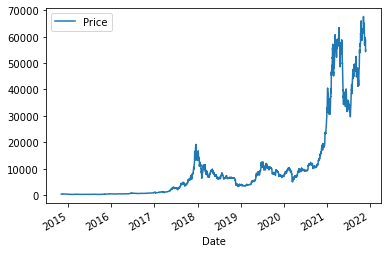

In [194]:
btc_prices.plot()

In [195]:
timesteps = btc_prices.index.to_numpy()
prices = btc_prices.Price.to_numpy()

timesteps[:10], prices[:10]

(array(['2014-11-02T00:00:00.000000000', '2014-11-03T00:00:00.000000000',
        '2014-11-04T00:00:00.000000000', '2014-11-05T00:00:00.000000000',
        '2014-11-06T00:00:00.000000000', '2014-11-07T00:00:00.000000000',
        '2014-11-08T00:00:00.000000000', '2014-11-09T00:00:00.000000000',
        '2014-11-10T00:00:00.000000000', '2014-11-11T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([325.22633, 331.60083, 324.71833, 332.45666, 336.585  , 346.775  ,
        344.81166, 343.065  , 358.50166, 368.07666]))

In [196]:
# Splitting Train and Test data
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

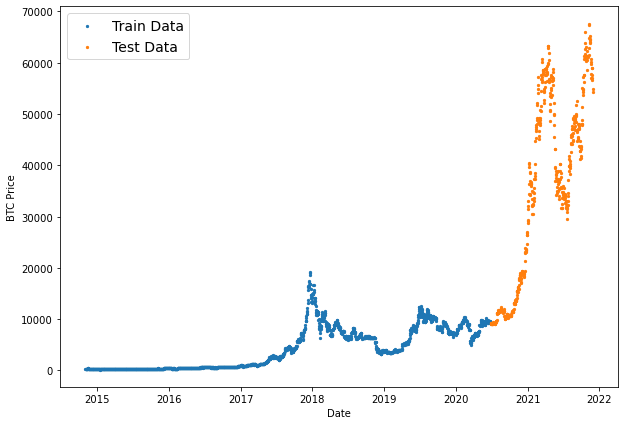

In [197]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label='Train Data')
plt.scatter(X_test, y_test, s=5, label='Test Data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14);

In [198]:
def plot_time_series(timesteps, values, format_='.', start=0, end=None, label=None):
    plt.plot(timesteps[start:end], values[start:end], format_, label=label)
    plt.xlabel('Time')
    plt.ylabel('BTC Price')
    plt.ylabel('BTC Price')
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

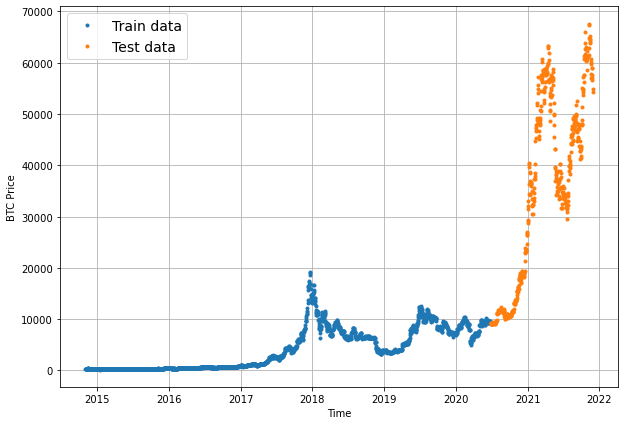

In [199]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

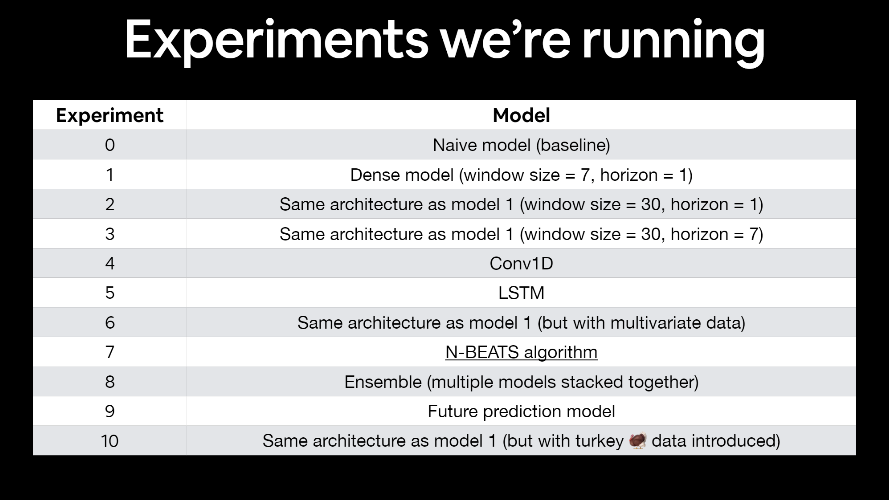

[MDBourke's Slides](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/slides/10_time_series_fundamentals_and_milestone_project_3_bitpredict.pdf)

### Model 0 - Naive Bayes (Offsetting)

where 
ŷ <sub>t</sub> = y <sub>t</sub> - 1  
by offsetting the dataset by 1, our naive bayes will be our training set since we'll be predicting that final index value throughout different models. 

In [200]:
naive_forecast = y_test[:-1]
naive_forecast[-5:], y_test[-5:]

(array([56713.25806333, 57653.98682917, 57055.58334455, 58890.52833524,
        54304.1281953 ]),
 array([57653.98682917, 57055.58334455, 58890.52833524, 54304.1281953 ,
        54877.47534653]))

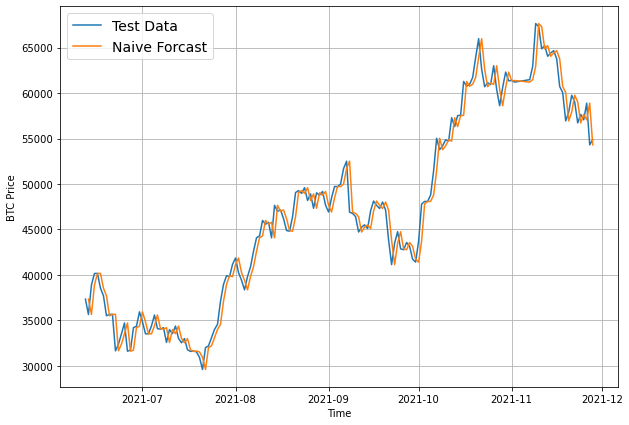

In [201]:
plt.figure(figsize=FIGSIZE)
plot_time_series(
    timesteps=X_test, 
    values=y_test, 
    start=350, 
    format_="-", 
    label='Test Data'
)
plot_time_series(
    timesteps=X_test[1:], 
    values=naive_forecast, 
    start=350,
    format_='-',
    label='Naive Forcast'
)

In [17]:
import tensorflow as tf

In [18]:
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true-y_pred))
    
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:1]))
    
    return mae / mae_naive_no_season

In [19]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.03836240615619712

In [144]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    
    return {
        'mae': mae.numpy(),
        'mse': mse.numpy(),
        'rmse' : rmse.numpy(),
        'mape' : mape.numpy(),
        'mase' : mase.numpy()
    }

In [21]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 990.88385,
 'mse': 2236128.0,
 'rmse': 1495.3688,
 'mape': 2.6530569,
 'mase': 0.038362402}

### Formatting Data Part 2 : Windowing our Dataset

In [22]:
import numpy as np

In [23]:
HORIZON = 1
WINDOW_SIZE = 7

def get_labelled_windows(x, horizon=HORIZON):
    return x[:, :-horizon], x[:, -horizon:]

In [24]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f'Window: {tf.squeeze(test_window.numpy())} -> Label : {tf.squeeze(test_label).numpy()}')

Window: [0 1 2 3 4 5 6] -> Label : 7


In [25]:
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
    
    windowed_array = x[window_indexes]
    
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    return windows, labels

In [26]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2573, 2573)

In [27]:
for i in range(3):
    print(full_windows[i], full_labels[i])

[325.22633 331.60083 324.71833 332.45666 336.585   346.775   344.81166] [343.065]
[331.60083 324.71833 332.45666 336.585   346.775   344.81166 343.065  ] [358.50166]
[324.71833 332.45666 336.585   346.775   344.81166 343.065   358.50166] [368.07666]


In [28]:
def make_train_test_splits(windows, labels, test_split=0.2):
    
    split_size=int(len(windows) * (1-test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    
    return train_windows, test_windows, train_labels, test_labels

In [29]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [30]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2058, 515, 2058, 515)

In [58]:
def create_model_checkpoint(model_name, save_path = 'model_experiment'):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              monitor='val_loss',
                                              verbose=0,
                                              save_best_only=True
                                             )

### Model 1 Dense Model (Window = 7, Horizon = 1)


In [60]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 0,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name=model_1.name)])

INFO:tensorflow:Assets written to: model_experiment\sequential_2\assets
INFO:tensorflow:Assets written to: model_experiment\sequential_2\assets
INFO:tensorflow:Assets written to: model_experiment\sequential_2\assets
INFO:tensorflow:Assets written to: model_experiment\sequential_2\assets
INFO:tensorflow:Assets written to: model_experiment\sequential_2\assets
INFO:tensorflow:Assets written to: model_experiment\sequential_2\assets
INFO:tensorflow:Assets written to: model_experiment\sequential_2\assets
INFO:tensorflow:Assets written to: model_experiment\sequential_2\assets
INFO:tensorflow:Assets written to: model_experiment\sequential_2\assets
INFO:tensorflow:Assets written to: model_experiment\sequential_2\assets
INFO:tensorflow:Assets written to: model_experiment\sequential_2\assets
INFO:tensorflow:Assets written to: model_experiment\sequential_2\assets
INFO:tensorflow:Assets written to: model_experiment\sequential_2\assets
INFO:tensorflow:Assets written to: model_experiment\sequential_2

In [61]:
model_1.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 1116.2007 - mae: 1116.2007 - mse: 2654040.0000


[1116.20068359375, 1116.20068359375, 2654040.0]

In [62]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [63]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows) 
len(model_1_preds), model_1_preds[:10]

(510,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([9135.2295, 9063.705 , 9011.245 , 9082.073 , 8943.277 , 9135.033 ,
        9172.521 , 9294.08  , 9302.525 , 9197.454 ], dtype=float32)>)

In [64]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([510]), TensorShape([510]))

In [65]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 1116.2007,
 'mse': 2654039.8,
 'rmse': 1629.1224,
 'mape': 3.0101054,
 'mase': 0.04292003}

In [66]:
naive_results

{'mae': 990.88385,
 'mse': 2236128.0,
 'rmse': 1495.3688,
 'mape': 2.6530569,
 'mase': 0.038362402}

In [67]:
test_labels.shape

(510, 1)

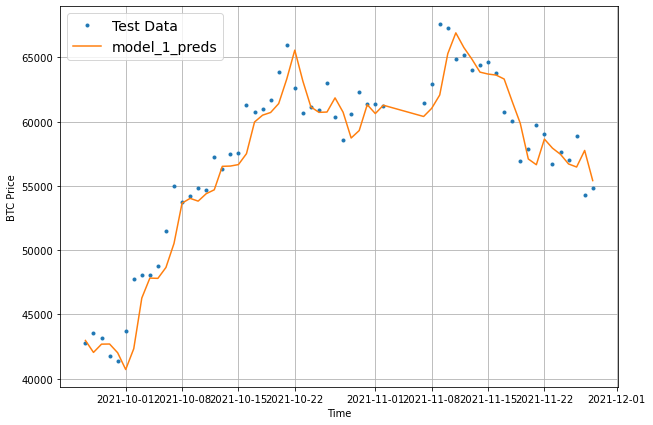

In [68]:
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset, 
                 format_="-",
                 label="model_1_preds")

### Model 2 : Dense Model (Window = 30, Horizon = 1)

In [69]:
HORIZON = 1
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)


In [70]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)

In [109]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
   #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name='model_2_dense')

model_2.compile(loss='MAE',
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0, 
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiment\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_2_dense\assets


In [110]:
model_2.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 1062.8162


1062.816162109375

In [111]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [112]:
tf.squeeze(test_labels).shape, model_2_preds.shape

(TensorShape([510]), TensorShape([510]))

In [113]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 1062.8162,
 'mse': 2527531.2,
 'rmse': 1589.8212,
 'mape': 2.8287578,
 'mase': 0.040867295}

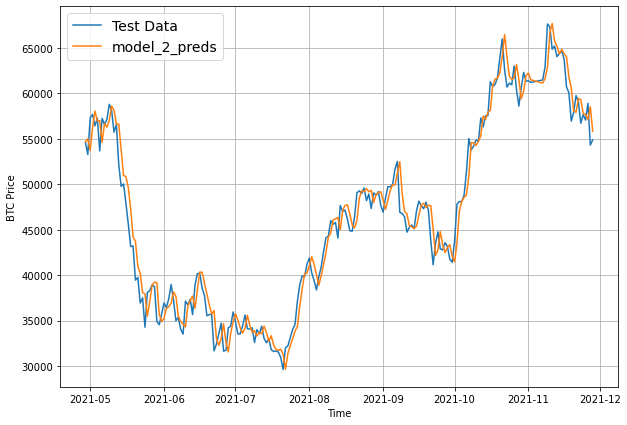

In [116]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format_="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format_="-", label="model_2_preds")

### Model 3 : Dense (Window = 30, Horizon = 7)

In [118]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, 
                                         window_size=WINDOW_SIZE, 
                                         horizon=HORIZON)

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)

In [153]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
   #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name='model_3_dense')

model_3.compile(loss='MAE',
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_3.name)])

INFO:tensorflow:Assets written to: model_experiment\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiment

In [154]:
model_3.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 2228.4307


2228.4306640625

In [155]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)

In [156]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[8979.905, 9183.126, 9185.552, 9061.118, 9007.799, 8990.31 ,
        8956.934],
       [8839.114, 9068.982, 9040.312, 8916.979, 8889.651, 8854.689,
        8800.271],
       [8911.761, 9085.384, 9120.228, 8935.371, 8903.102, 8921.115,
        8869.228],
       [8903.847, 9090.596, 9066.153, 8953.518, 8937.579, 8870.501,
        8842.224],
       [8920.152, 9106.706, 9128.859, 8974.037, 8929.464, 8908.518,
        8862.665]], dtype=float32)>

In [157]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results;

In [158]:
model_3.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 2228.4307


2228.4306640625

In [159]:
tf.reduce_mean(model_3_results["mae"]).numpy()

2228.4307

In [160]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [162]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 2228.4307,
 'mse': 10760898.0,
 'rmse': 2536.2205,
 'mape': 5.949121,
 'mase': 0.086535424}

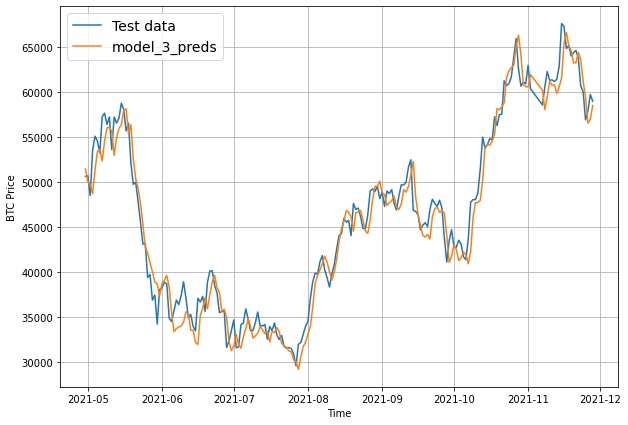

In [163]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 format_="-",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,
                 format_="-", 
                 label="model_3_preds")

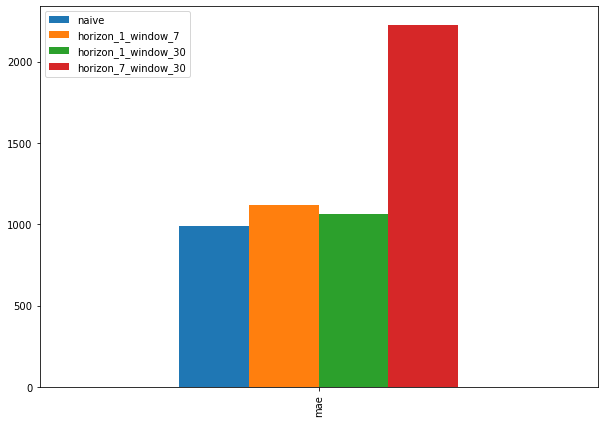

In [164]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### Model 4 : Conv1D

In [203]:
HORIZON = 1
WINDOW_SIZE = 7

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2058, 515, 2058, 515)

In [204]:
train_windows[0].shape

(7,)

In [205]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([325.22633, 331.60083, 324.71833, 332.45666, 336.585  , 346.775  ,
       344.81166])>

In [206]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [207]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDIW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[325.22632]
 [331.60083]
 [324.71832]
 [332.45667]
 [336.585  ]
 [346.775  ]
 [344.81165]]


In [209]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
  tf.keras.layers.Dense(HORIZON)                      
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiment\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiment\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiment\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiment\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiment\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiment\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiment\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiment\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiment\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiment\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiment\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiment\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiment\model_4_conv1D\assets
INFO:tensorflow:Assets written to: mod

In [210]:
model_4.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 3ms/step - loss: 1050.0176


1050.017578125

In [213]:
model_4_preds = make_preds(model_4, test_windows)
#model_4_preds[:10]

In [214]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 1050.0177,
 'mse': 2413475.5,
 'rmse': 1553.5365,
 'mape': 2.8430917,
 'mase': 0.04065179}

In [217]:
model_4_preds

<tf.Tensor: shape=(515,), dtype=float32, numpy=
array([ 9120.532 ,  8988.69  ,  9009.806 ,  9096.453 ,  9095.27  ,
        9156.329 ,  9068.382 ,  9037.812 ,  9054.422 ,  9008.829 ,
        9167.724 ,  9190.307 ,  9367.544 ,  9232.238 ,  9187.773 ,
        9169.857 ,  9211.916 ,  9187.382 ,  9191.972 ,  9160.077 ,
        9089.597 ,  9090.857 ,  9108.315 ,  9125.412 ,  9114.67  ,
        9284.896 ,  9442.954 ,  9546.645 ,  9527.644 ,  9624.259 ,
        9832.444 , 10858.342 , 10956.323 , 11187.568 , 11110.863 ,
       11277.547 , 11624.211 , 11216.879 , 11172.1455, 11148.77  ,
       11487.281 , 11690.266 , 11607.932 , 11657.556 , 11617.78  ,
       11728.41  , 11372.045 , 11423.124 , 11618.276 , 11701.866 ,
       11798.133 , 11821.837 , 12221.487 , 12077.407 , 11757.554 ,
       11730.55  , 11551.603 , 11570.1455, 11572.296 , 11643.962 ,
       11380.713 , 11359.393 , 11250.296 , 11360.973 , 11423.989 ,
       11549.37  , 11602.069 , 11831.332 , 11479.605 , 10800.277 ,
       10499.3

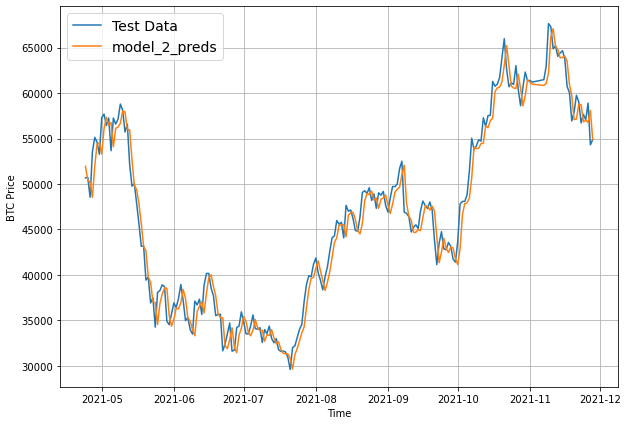

In [219]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format_="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_4_preds, start=offset, format_="-", label="model_2_preds")

In [222]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE))
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = tf.keras.layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = tf.keras.layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiment\model_5_LSTM\assets


In [223]:
model_5.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 5ms/step - loss: 1145.7841


1145.7840576171875

In [225]:
model_5_preds = make_preds(model_5, test_windows)
#model_5_preds[:5]

In [226]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 1145.7842,
 'mse': 2823825.0,
 'rmse': 1680.4241,
 'mape': 3.1019413,
 'mase': 0.04435942}

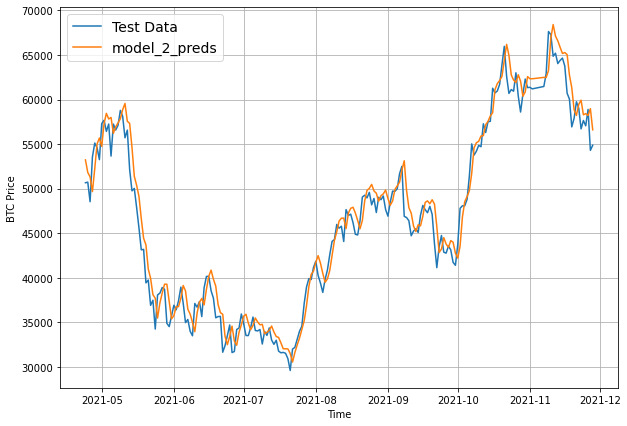

In [227]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format_="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_5_preds, start=offset, format_="-", label="model_2_preds")